## **Analyzing the Iris dataset using Python**

### Import Python packages:

In [117]:

# packages will be updated according to the task progression.

import csv
# for dataframes 
import pandas as pd
# machine Learning Library that contains datasets.
import sklearn as skl 
# plotting library
import matplotlib.pyplot as plt



### Output a summary of each Iris dataset variable to a single text file  


* Load dataset

In [118]:
# Load the iris dataset.
# using the file path as I already downloaded the IRIS dataset in csv format.
# the method is explained in Pandas documentation 
# https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html#
# pandas.read_csv(filepath_or_buffer, *, sep=<no_default>, delimiter=None  )

* Import dataset previously downloaded

In [119]:
# as we already imported pd and downloaded the dataset, I went to the folder where the file is saved, and through properties I did copy the file path.
# assigning a value 
file_path = (r'C:\Users\marou\Desktop\pands\pands-project\iris dataset\iris.data')
# read the data
iris_data = pd.read_csv(file_path )

* Dataframe

In [120]:
# show dataframe
# dataset shape shows 5 columns with 149 rows. I can see that the target column (species) of the dataset is included, while the column names are not. 
# reference : https://archive.ics.uci.edu/dataset/53/iris
iris_data

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


* Summary of each Iris dataset variable

In [121]:
# add meaningful columns names
# https://archive.ics.uci.edu/dataset/53/iris ( see variables table )
column_names = ['sepal length in cm' , 'sepal width in cm' , 'petal length in cm' , 'petal width in cm', 'species']
iris_data = pd.read_csv(file_path, header= None, names=column_names)
# show data frame

In [122]:
# summary of the 4 variables of Iris dataset.
# The describe() method returns description of the data in the dataframe. As the dataframe contains numerical data, the description contains these information for each column: 
# count, mean, std, min, 25%, 50%, 75%, max
# https://www.w3schools.com/python/pandas/ref_df_describe.asp#:~:text=The%20describe()%20method%20returns,The%20average%20(mean)%20value.   (see .describe() method )
iris_data.describe()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [123]:
# identify the Iris data set variables and output a single summary txt file of each
# in the follwoing, I assigned a variable to each column name, and applied .describe() to output the descriptive stats.
# sepal length summary
sepal_length = iris_data['sepal length in cm']
sepal_length_summary = sepal_length.describe()
sepal_length_summary 

# sepal width summary
sepal_width = iris_data['sepal width in cm']
sepal_width_summary = sepal_width.describe()
sepal_width_summary

# petal length summary
petal_length = iris_data['petal length in cm']
petal_length_summary = petal_length.describe()
petal_length_summary

## petal width summary
petal_width = iris_data['petal width in cm']
petal_width_summary = petal_width.describe()
petal_width_summary

print(sepal_length_summary, sepal_width_summary, petal_length_summary, petal_width_summary)

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal length in cm, dtype: float64 count    150.000000
mean       3.054000
std        0.433594
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: sepal width in cm, dtype: float64 count    150.000000
mean       3.758667
std        1.764420
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: petal length in cm, dtype: float64 count    150.000000
mean       1.198667
std        0.763161
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: petal width in cm, dtype: float64


In [124]:
# here I used for loop to actually loop through the variable summaries to save them into txt files.

# I skip the class. I applied the negative indexing method 
for column in iris_data.columns[:-1]:  
    summary = iris_data[column].describe()
    file_name = f"{column}_summary.txt"
# save summary to individual text file
    with open(file_name, 'w') as f:
        f.write(summary.to_string())
print("!Note: a summary of each variable of Iris data set was saved into a single .txt file, see repository files")


!Note: a summary of each variable of Iris data set was saved into a single .txt file, see repository files


### Saves a histogram of each variable to png files


In [125]:
# to simplify the reading and coding, assign a variable for each feature of the data set.

sepal_length    = iris_data['sepal length in cm']
sepal_width     = iris_data['sepal width in cm']
petal_length    = iris_data['petal length in cm']
petal_width     = iris_data['petal width in cm']

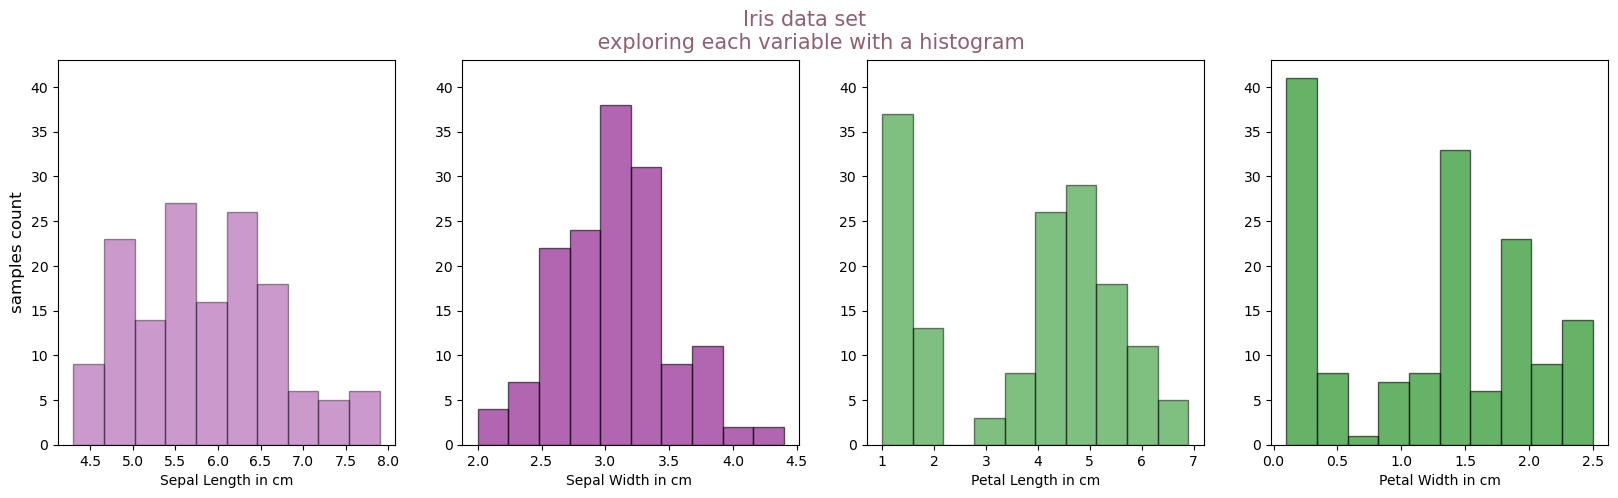

In [126]:
# create a figure and axis
# method used to display Multiple Plots
# reference : https://www.w3schools.com/Python/matplotlib_subplot.asp
# (1,4) the figure has 1 rows, 4 columns. I updated from (2,2) 

# Create a figure and a set of subplots
# shareY is now set to True which will allow Y axis to be shared among all plots.  
# reference : https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html#:~:text=the%20subplot%20grid.-,sharex%2C%20sharey,-bool%20or%20%7B%27none
# create multiple subplots using plt.subplots
# reference : https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
fig, axs = plt.subplots(1, 4, figsize=(20,5), sharey=True)
# add suptitle for the 4 histograms
# https://stackoverflow.com/questions/21967639/how-to-write-a-plot-title-in-more-than-one-line-using-suptitle  

plt.suptitle("Iris data set \n exploring each variable with a histogram", fontsize=15, color='#915F6D')

# 1st plot in the row.
axs[0].hist(sepal_length,ec= "k", color='purple',alpha=0.4)
axs[0].set_ylabel("samples count",fontsize=12, color="k")
# now that Y axis is shared, I used the tick parameters to add ticks to each y axis to simplify the count reading.
# reference : https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.tick_params.html
axs[0].yaxis.set_tick_params(labelleft=True)
axs[0].set_xlabel("Sepal Length in cm")

# 2nd plot in the row.
axs[1].hist(sepal_width,ec= "k", color='purple',alpha=0.6)
axs[1].yaxis.set_tick_params(labelleft=True)
axs[1].set_xlabel("Sepal Width in cm ")


# 3rd plot in the row.
axs[2].hist(petal_length,ec= "k", color='g',alpha=0.5)
axs[2].yaxis.set_tick_params(labelleft=True)
axs[2].set_xlabel("Petal Length in cm")

# 4th plot in the row.
axs[3].hist(petal_width,ec= "k", color='g' ,alpha=0.6)
axs[3].yaxis.set_tick_params(labelleft=True)
axs[3].set_xlabel("Petal Width in cm")

# save fig in ong format
plt.savefig("histograms.png")

